# Group 5
## Team members:
- Jianting Liu(8950907)
- David (8999846) 
- Marieth (9016702)


### Use case

The study examines whether there is a significant correlation between mortgage rates and house prices in Canada over a 20-year period, and quantifies the impact of these rates on housing market performance.

Null Hypothesis (𝐻0)
There is no significant correlation between mortgage rates and house prices in Canada.

Alternative Hypothesis (𝐻𝑎 )
There is a significant correlation between mortgage rates and house prices in Canada.

In [1]:
import pandas as pd

df = pd.read_excel('final_merged_data.xlsx')
rate_data = pd.read_csv('rate.csv')
df
rate_data

,Date,Mortgage Rate,Interest Rate
0,2005-01-01,5.60,2.75
1,2005-02-01,5.59,2.75
2,2005-03-01,5.60,2.75
3,2005-04-01,5.67,2.75
4,2005-05-01,5.55,2.75
...,...,...,...
204,2022-01-01,3.44,0.50
205,2022-02-01,3.58,0.50
206,2022-03-01,3.77,0.75
207,2022-04-01,4.19,1.25


In [2]:
merged_df = df.merge(rate_data, on='Date')
merged_df.to_csv("Ratedata.csv",index=False)
print(merged_df)

           Date  Composite  One_storey  Two_storey  Townhouse  Apartment_unit  \
0    2005-01-01     239800      207700      302900     201700          172000   
1    2005-02-01     240500      208400      303300     202300          173000   
2    2005-03-01     241300      209200      304300     202900          173900   
3    2005-04-01     242000      210100      304800     203300          174600   
4    2005-05-01     242600      210600      305400     203700          175400   
..          ...        ...         ...         ...        ...             ...   
204  2022-01-01     810100      693400     1053600     723700          542000   
205  2022-02-01     834700      713600     1085300     746300          558200   
206  2022-03-01     834300      711100     1080900     757800          571000   
207  2022-04-01     819800      696900     1056700     747500          568200   
208  2022-05-01     804500      682600     1033900     737600          566000   

     Median income    Popul

In [3]:
import pandas as pd

# read data
df = pd.read_csv('./Ratedata.csv')

# convert column
df_melted_new = pd.melt(
   df,
   id_vars=['Date','Median income','Population','Mortgage Rate','Interest Rate'],  # remain column
   value_vars=['One_storey', 'Two_storey', 'Townhouse', 'Apartment_unit', 'Composite'],  # convert columns
   var_name='property_type',  # new column
   value_name='price'  # new price
)
df_melted_new
df_melted_new.to_csv('melted_data_1120.csv', index=False)

df = pd.read_csv('melted_data_1120.csv')
df


,Date,Median income,Population,Mortgage Rate,Interest Rate,property_type,price
0,2005-01-01,4487.500000,1.069167e+07,5.60,2.75,One_storey,207700
1,2005-02-01,4487.500000,1.069167e+07,5.59,2.75,One_storey,208400
2,2005-03-01,4487.500000,1.069167e+07,5.60,2.75,One_storey,209200
3,2005-04-01,4487.500000,1.071352e+07,5.67,2.75,One_storey,210100
4,2005-05-01,4487.500000,1.071352e+07,5.55,2.75,One_storey,210600
...,...,...,...,...,...,...,...
1040,2022-01-01,5066.666667,1.285534e+07,3.44,0.50,Composite,810100
1041,2022-02-01,5066.666667,1.285534e+07,3.58,0.50,Composite,834700
1042,2022-03-01,5066.666667,1.285534e+07,3.77,0.75,Composite,834300
1043,2022-04-01,5066.666667,1.289414e+07,4.19,1.25,Composite,819800


In [4]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

# Load the data
df = pd.read_csv('melted_data_1120.csv')

# Display the first rows of the DataFrame to verify
print(df.head())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())
df = df.dropna()

# Calculate the Pearson correlation between 'Mortgage Rate' and 'price'
pearson_corr, p_value_pearson = pearsonr(df['Mortgage Rate'], df['price'])

# Calculate the Spearman correlation between 'Mortgage Rate' and 'price'
spearman_corr, p_value_spearman = spearmanr(df['Mortgage Rate'], df['price'])

# Correlation results
print("\nCorrelation results:")
print(f"Pearson Correlation: Coefficient = {pearson_corr:.4f}, p-value = {p_value_pearson:.4f}")
print(f"Spearman Correlation: Coefficient = {spearman_corr:.4f}, p-value = {p_value_spearman:.4f}")

# Hypothesis evaluation
alpha = 0.05
if p_value_pearson < alpha:
    print("\nWe reject H₀: There is a significant correlation between mortgage rates and house prices.")
else:
    print("\nWe fail to reject H₀: There is not enough evidence to claim a significant correlation.")


         Date  Median income    Population  Mortgage Rate  Interest Rate  \
0  2005-01-01         4487.5  1.069167e+07           5.60           2.75   
1  2005-02-01         4487.5  1.069167e+07           5.59           2.75   
2  2005-03-01         4487.5  1.069167e+07           5.60           2.75   
3  2005-04-01         4487.5  1.071352e+07           5.67           2.75   
4  2005-05-01         4487.5  1.071352e+07           5.55           2.75   

  property_type   price  
0    One_storey  207700  
1    One_storey  208400  
2    One_storey  209200  
3    One_storey  210100  
4    One_storey  210600  

Missing values per column:
Date             0
Median income    0
Population       0
Mortgage Rate    0
Interest Rate    0
property_type    0
price            0
dtype: int64

Correlation results:
Pearson Correlation: Coefficient = -0.5799, p-value = 0.0000
Spearman Correlation: Coefficient = -0.6637, p-value = 0.0000

We reject H₀: There is a significant correlation between mortgage r

Model coefficients:
Slope: -94437.2009
Intercept: 832621.5884


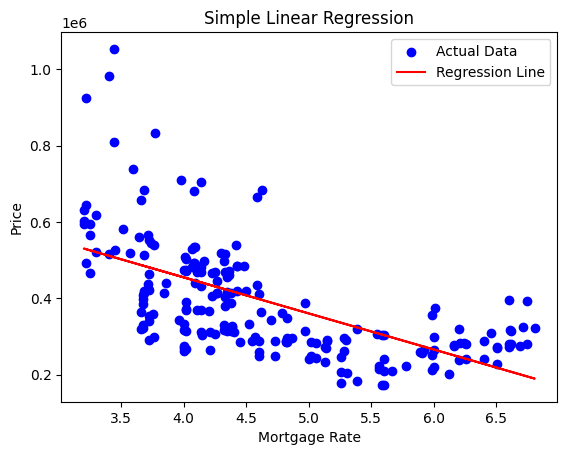

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Independent and dependent variables
X = df[['Mortgage Rate']]  # Independent variable
y = df['price']  # Dependent variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model coefficients
print("Model coefficients:")
print(f"Slope: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Visualization of the results
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Mortgage Rate')
plt.ylabel('Price')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


In [6]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared (R²): {r2:.4f}")


Model Evaluation:
Mean Squared Error (MSE): 13706968376.63
R-Squared (R²): 0.3808


 ### Analysis:

 - Such a high value of the MSE suggests that there is still quite a discrepancy between predictions and actual data.
 - The 𝑅2 indicates what proportion of the variability in house prices can be explained by mortgage rates.
 - A value of 𝑅2 = 0.3808 means that 38.08% of the variability in prices can be explained by the model.
 - A low 𝑅2 could indicate that other variables are important in explaining the price.

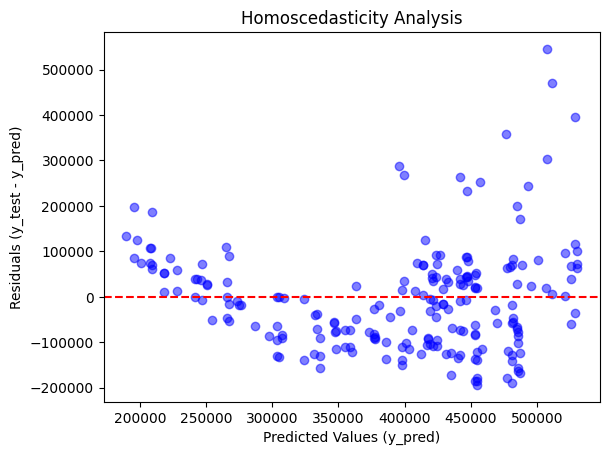

In [7]:
# Homoscedasticity
residuals = y_test - y_pred

# Plot the residuals against the predictions
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values (y_pred)')
plt.ylabel('Residuals (y_test - y_pred)')
plt.title('Homoscedasticity Analysis')
plt.show()


### Analysis 
- No homoscedasticity
- There is evidence of heteroskedasticity because the dispersion of the residuals varies across the predicted values:
- The variance of the errors is not constant

## Conclusion:
 - With the R2 and homoscedasticity analysis it can be concluded that the linear regression model between mortgage rates and house prices is not fitting the data well.
 - A more complex model with more variables or a polynomial model could be used in order to have predictions on the price.